# Pymaceuticals Inc.
---

### Analysis

- In this analysis, we can see the results of several different drugs and their effects on mouse tumor development. These drugs are Capomulin, Ramicane, Infubinol, and Ceftamin.
1. The only drug with an outlier is Infubionol; this could be due to errors in testing, or a unique reaction dependent on a unique genetic makeup of the rats in question that produced the result. Looking into this result could provide further details into the mechanisms of action for the drug in mice with this genetic makeup, or potentially highlight the specific issue with testing leading to the outlier.
2. We can see a siginifcant reduction in tumor volume occur around halfway through the treatment of the mouse on Capomulin; this drop in tumor volume seems to remain mostly consistent through the rest of the treatment, providing potential evidence that this drug does in fact meaningfully reduce the tumor volume for this mouse.
3. There is a high level of correlation between tumor volume and mouse weight; as mouse weight increases, so does tumor volume. This could be due to the mice having larger mass overall leading to a larger tumor mass, but could also potentially mean the drugs may be less effective as mouse weight increases if not properly scaled to their weight. 

With more data, the connection between drug type, dosage amount, tumor volume and length of treatment may become more apparent. Treatment start time in terms of onset of tumor detetion, tumor aggresivity, mouse genetics, and dosage variables depdent on these could help provide more insight into the nature of the drugs MOA and potential efficacy in a range of situations, helping to explain both outliers and potential treatment implementations, as well as implications for a wider audience of clinical trials.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns

# data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, how='left', on='Mouse ID')

# Display the data
print("Combined Data:")
print(combined_data.to_string(index=False))

Combined Data:
Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen    Sex  Age_months  Weight (g)
    b128          0           45.000000                 0    Capomulin Female           9          22
    f932          0           45.000000                 0     Ketapril   Male          15          29
    g107          0           45.000000                 0     Ketapril Female           2          29
    a457          0           45.000000                 0     Ketapril Female          11          30
    c819          0           45.000000                 0     Ketapril   Male          21          25
    h246          0           45.000000                 0     Ketapril   Male          13          30
    p189          0           45.000000                 0     Ketapril   Male           8          28
    n923          0           45.000000                 0     Ketapril   Male          19          30
    q119          0           45.000000                 0     Ketap

In [2]:
# Check number of mice
num_mice = combined_data['Mouse ID'].nunique()
print(f'The number of mice in the combined dataset is: {num_mice}')

The number of mice in the combined dataset is: 249


In [3]:
# duplicate mice by ID
duplicate_mice_ids = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]['Mouse ID'].unique()

print("Duplicate Mice:")
print(duplicate_mice_ids)


Duplicate Mice:
['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID
# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

# Optional: Get all the data for the duplicate mouse ID
duplicate_mouse_id = 'g989'
all_data_duplicate_mouse = combined_data[combined_data['Mouse ID'] == duplicate_mouse_id]
print(f"All data for the duplicate Mouse ID '{duplicate_mouse_id}':")
print(all_data_duplicate_mouse)


All data for the duplicate Mouse ID 'g989':
     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen     Sex  Age_months  Weight (g)
107      g989          0           45.000000                 0     Propriva  Female          21          26
137      g989          0           45.000000                 0     Propriva  Female          21          26
329      g989          5           48.786801                 0     Propriva  Female          21          26
360      g989          5           47.570392                 0     Propriva  Female          21          26
620      g989         10           51.745156                 0     Propriva  Female          21          26
681      g989         10           49.880528                 0     Propriva  Female          21          26
815      g989         15           51.325852                 1     Propriva  Female          21          26
869      g989         15           53.442020                 0     Propriva  Female         

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

# Create a clean DataFrame by dropping the duplicate mouse by its ID
cleaned_data = combined_data[combined_data['Mouse ID'] != 'g989']

# Display the cleaned data for preview
print(cleaned_data)



     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen     Sex  Age_months  Weight (g)
0        b128          0           45.000000                 0    Capomulin  Female           9          22
1        f932          0           45.000000                 0     Ketapril    Male          15          29
2        g107          0           45.000000                 0     Ketapril  Female           2          29
3        a457          0           45.000000                 0     Ketapril  Female          11          30
4        c819          0           45.000000                 0     Ketapril    Male          21          25
...       ...        ...                 ...               ...          ...     ...         ...         ...
1888     r944         45           41.581521                 2    Capomulin    Male          12          25
1889     u364         45           31.023923                 3    Capomulin    Male          18          17
1890     p438         45    

In [6]:
# Check number of mice in the clean DataFrame
num_mice_cleaned = cleaned_data['Mouse ID'].nunique()
print(f'The number of mice in the cleaned dataset is: {num_mice_cleaned}')

The number of mice in the cleaned dataset is: 248


## Summary Statistics

In [7]:
# Group by 'Drug Regimen' and calculate mean, median, variance, standard deviation, and SEM of the tumor volume
summary_stats = cleaned_data.groupby('Drug Regimen').agg(
    mean=('Tumor Volume (mm3)', 'mean'),
    median=('Tumor Volume (mm3)', 'median'),
    variance=('Tumor Volume (mm3)', 'var'),
    std_dev=('Tumor Volume (mm3)', 'std'),
    sem=('Tumor Volume (mm3)', 'sem')
)

# Display the summary statistics DataFrame
print("Summary Statistics DataFrame of Tumor Volume for Each Drug Regimen:")
print(summary_stats)



Summary Statistics DataFrame of Tumor Volume for Each Drug Regimen:
                   mean     median   variance   std_dev       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


In [19]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,

summary_stats_single_line = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean='mean',
    Median='median',
    Variance='var',
    Std_Deviation='std',
    SEM='sem'
)

# Display the summary statistics table
print("Summary Statistics Table of Tumor Volume for Each Drug Regimen (Single Line):")
print(summary_stats_single_line)


Summary Statistics Table of Tumor Volume for Each Drug Regimen (Single Line):
                   Mean     Median   Variance  Std_Deviation       SEM
Drug Regimen                                                          
Capomulin     40.675741  41.557809  24.947764       4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177       6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684       6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577       8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479       8.134708  0.596466
Placebo       54.033581  52.288934  61.168083       7.821003  0.581331
Propriva      52.320930  50.446266  43.852013       6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704       4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562       7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355       6.966589  0.516398


## Bar and Pie Charts

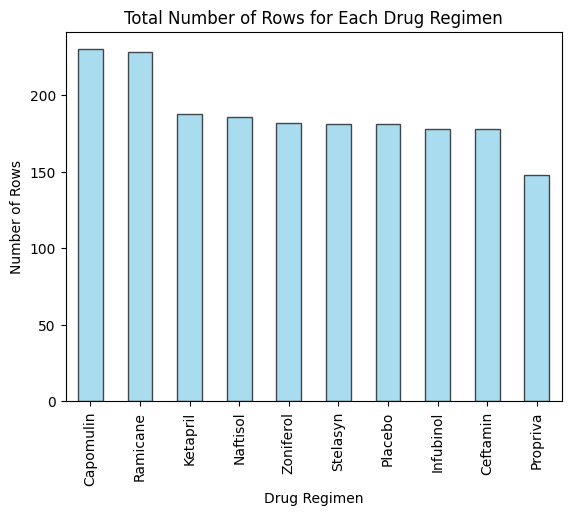

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

drug_counts = cleaned_data['Drug Regimen'].value_counts()

# Plot the bar chart
drug_counts.plot(kind='bar', color='skyblue', alpha=0.7, edgecolor='black')

# Set chart title and labels
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')

# Show the plot
plt.show()


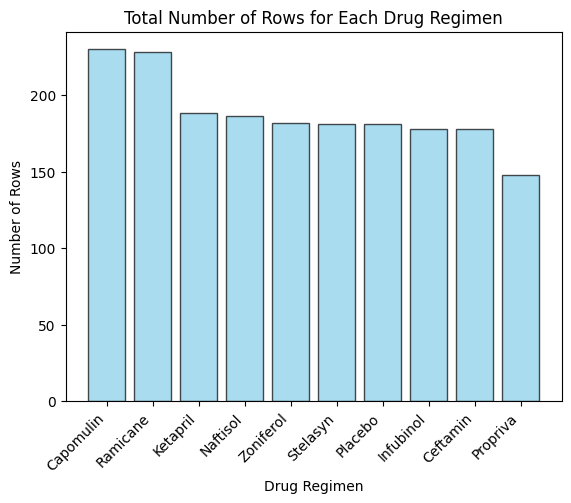

In [20]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.


# Calculate the total number of rows for each drug regimen
drug_counts = cleaned_data['Drug Regimen'].value_counts()

# Create a bar plot using pyplot
plt.bar(drug_counts.index, drug_counts, color='skyblue', alpha=0.7, edgecolor='black')

# Set chart title and labels
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


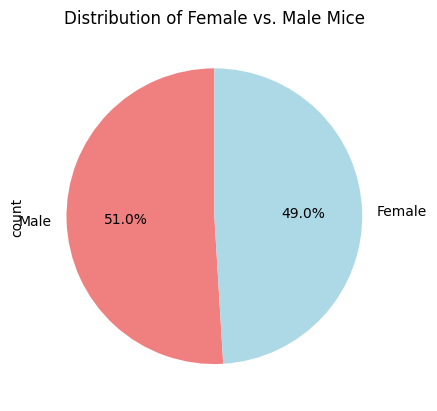

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_distribution = cleaned_data['Sex'].value_counts()

# Plot the pie chart using Pandas
gender_distribution.plot.pie(autopct='%1.1f%%', colors=['lightcoral', 'lightblue'], startangle=90)

# Set chart title
plt.title('Distribution of Female vs. Male Mice')

# Show the plot
plt.show()



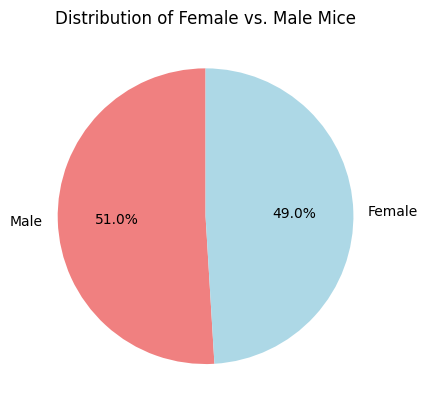

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pyplot
gender_distribution = cleaned_data['Sex'].value_counts()

# Create a pie chart using Pyplot
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', colors=['lightcoral', 'lightblue'], startangle=90)

# Set chart title
plt.title('Distribution of Female vs. Male Mice')

# Show the plot
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# List of treatment regimens
selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Filter the DataFrame for the selected regimens
final_tumor_volume_df = cleaned_data[cleaned_data['Drug Regimen'].isin(selected_regimens)]

# Get the last timepoint for each mouse
last_timepoint_df = final_tumor_volume_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(last_timepoint_df, cleaned_data, on=['Mouse ID', 'Timepoint'], how='left')

# Display the DataFrame with the final tumor volume for each mouse
print("Final Tumor Volume for Each Mouse:")
print(merged_df[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']])


Final Tumor Volume for Each Mouse:
   Mouse ID Drug Regimen  Tumor Volume (mm3)
0      a203    Infubinol           67.973419
1      a251    Infubinol           65.525743
2      a275     Ceftamin           62.999356
3      a411     Ramicane           38.407618
4      a444     Ramicane           43.047543
..      ...          ...                 ...
95     y769     Ceftamin           68.594745
96     y793    Capomulin           31.896238
97     y865     Ceftamin           64.729837
98     z578     Ramicane           30.638696
99     z581    Infubinol           62.754451

[100 rows x 3 columns]


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Loop through each regimen
for regimen in selected_regimens:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = merged_df.loc[merged_df['Drug Regimen'] == regimen, 'Tumor Volume (mm3)']
    
    # Append subset to tumor_vol_data
    tumor_vol_data.append(tumor_vol)
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers
    quartiles = tumor_vol.quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    
    # Determine outliers using upper and lower bounds
    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 * iqr
    
    # Identify potential outliers
    outliers = tumor_vol[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    
    # Print results
    print(f"{regimen}'s potential outliers: {outliers}")

# Display the tumor volume data for later use in box plot
print("\nTumor Volume Data for Box Plot:")
print(tumor_vol_data)



Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Tumor Volume Data for Box Plot:
[9     38.982878
12    38.939633
24    30.485985
25    37.074024
26    40.159220
32    47.685963
33    37.311846
34    38.125164
35    38.753265
45    41.483008
49    38.846876
51    28.430964
53    33.329098
64    46.539206
65    32.377357
68    41.581521
70    23.343598
72    40.728578
73    34.455298
78    31.023923
82    40.658124
83    39.952347
88    36.041047
90    28.484033
96    31.896238
Name: Tumor Volume (mm3), dtype: float64, 3     38.407618
4     43.047543
5     38.810366
7     32.978522
16    38.342008
17    33.397653
19    37.311236
21    40.659006
27    29.128472
29    33.562402
30    36.374510
37    

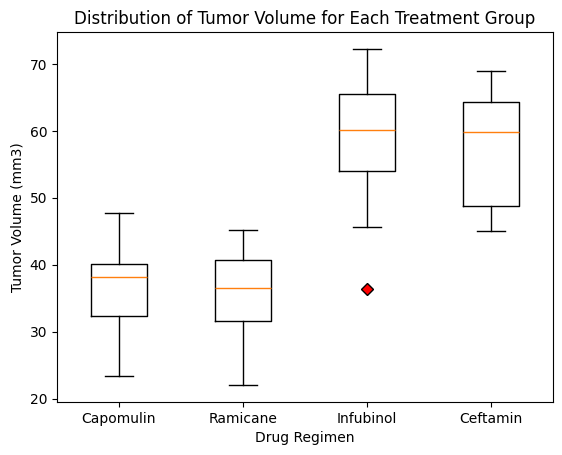

In [15]:
# Generate a box plot for each treatment group using tumor_vol_data
plt.boxplot(tumor_vol_data, labels=selected_regimens, flierprops=dict(markerfacecolor='red', marker='D'))

# Set chart title and labels
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')

# Show the plot
plt.show()



## Line and Scatter Plots

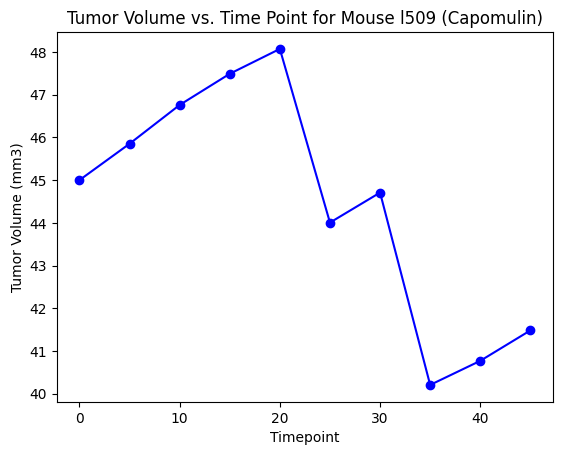

In [16]:

# mouse treated with Capomulin 
selected_mouse_id = 'l509'
capomulin_data_single_mouse = cleaned_data[(cleaned_data['Drug Regimen'] == 'Capomulin') & (cleaned_data['Mouse ID'] == selected_mouse_id)]

# Check if data exists for the selected mouse
if capomulin_data_single_mouse.empty:
    print(f"No data found for Mouse ID {selected_mouse_id} in the Capomulin regimen.")
else:
    # Plot the line chart
    plt.plot(capomulin_data_single_mouse['Timepoint'], capomulin_data_single_mouse['Tumor Volume (mm3)'], marker='o', color='b')

    # Set chart title and labels
    plt.title(f'Tumor Volume vs. Time Point for Mouse {selected_mouse_id} (Capomulin)')
    plt.xlabel('Timepoint')
    plt.ylabel('Tumor Volume (mm3)')

    # Show the plot
    plt.show()




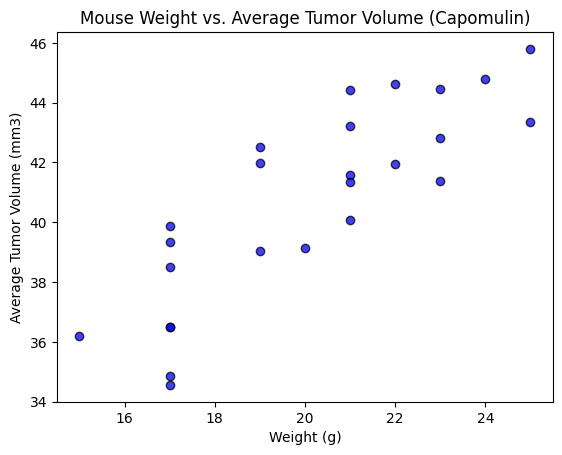

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
import matplotlib.pyplot as plt

# Filter data for the Capomulin regimen
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

# Calculate the average observed tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge the average tumor volume with the mouse metadata to get the corresponding weights
merged_data = pd.merge(average_tumor_volume, mouse_metadata, on='Mouse ID', how='inner')

# Create a scatter plot
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], marker='o', facecolors='blue', edgecolors='black', alpha=0.75)

# Set chart title and labels
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.show()


## Correlation and Regression

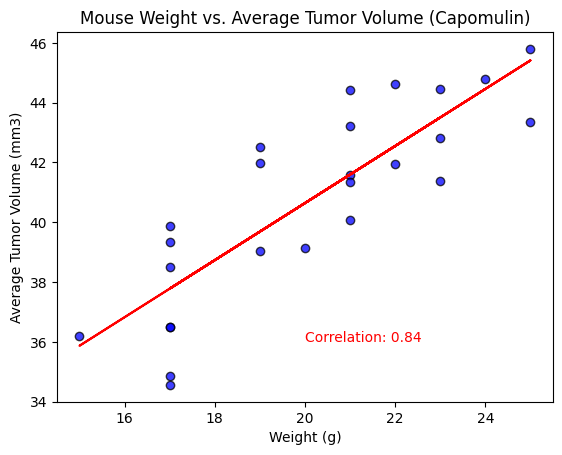

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress

# Calculate the correlation coefficient
correlation = merged_data['Weight (g)'].corr(merged_data['Tumor Volume (mm3)'])

# linear regression
slope, intercept, r_value, p_value, std_err = linregress(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])

# Create a scatter plot
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], marker='o', facecolors='blue', edgecolors='black', alpha=0.75)

# Add the linear regression line to the plot
regress_values = merged_data['Weight (g)'] * slope + intercept
plt.plot(merged_data['Weight (g)'], regress_values, color='red')

# chart title and labels
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Display the correlation coefficient
plt.annotate(f'Correlation: {correlation:.2f}', (20, 36), color='red')

# Show plot
plt.show()
